# Stock prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import requests

In [2]:
url = f'https://iex.lewagon.com/stable/stock/aapl/chart/3m'
api_data = requests.get(url).json()

In [4]:
type(api_data)

list

In [5]:
pd.DataFrame(api_data)

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,141.86,142.4300,138.81,140.890,2023-01-25,AAPL,65799349,HISTORICAL_PRICES,AAPL,,...,138.81,65799349,140.675,141.644,142.2130,138.598,65799349,"Jan 25, 23",0.00,0.0000
1,143.96,144.2500,141.90,143.170,2023-01-26,AAPL,54105068,HISTORICAL_PRICES,AAPL,,...,141.90,54105068,142.952,143.741,144.0300,141.684,54105068,"Jan 26, 23",2.10,0.0148
2,145.93,147.2300,143.08,143.155,2023-01-27,AAPL,70555843,HISTORICAL_PRICES,AAPL,,...,143.08,70555843,142.937,145.708,147.0060,142.862,70555843,"Jan 27, 23",1.97,0.0137
3,143.00,145.5500,142.85,144.955,2023-01-30,AAPL,64015274,HISTORICAL_PRICES,AAPL,,...,142.85,64015274,144.734,142.782,145.3280,142.632,64015274,"Jan 30, 23",-2.93,-0.0201
4,144.29,144.3400,142.28,142.700,2023-01-31,AAPL,65874459,HISTORICAL_PRICES,AAPL,,...,142.28,65874459,142.483,144.070,144.1200,142.063,65874459,"Jan 31, 23",1.29,0.0090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,166.47,167.4100,165.65,166.100,2023-04-18,AAPL,49923008,HISTORICAL_PRICES,AAPL,,...,165.65,49923008,166.100,166.470,167.4100,165.650,49923008,"Apr 18, 23",1.24,0.0075
58,167.63,168.1600,165.54,165.800,2023-04-19,AAPL,47720166,HISTORICAL_PRICES,AAPL,,...,165.54,47720166,165.800,167.630,168.1600,165.540,47720166,"Apr 19, 23",1.16,0.0070
59,166.65,167.8700,165.56,166.090,2023-04-20,AAPL,52456377,HISTORICAL_PRICES,AAPL,,...,165.56,52456377,166.090,166.650,167.8700,165.560,52456377,"Apr 20, 23",-0.98,-0.0058
60,165.02,166.4521,164.49,165.050,2023-04-21,AAPL,58337341,HISTORICAL_PRICES,AAPL,,...,164.49,58337341,165.050,165.020,166.4521,164.490,58337341,"Apr 21, 23",-1.63,-0.0098


In [2]:
def fix_datetime_on_dataframe(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(keys='date', inplace=True)

In [3]:
def create_stock_df_of_company(company_code):
    url = f'https://iex.lewagon.com/stable/stock/{company_code}/chart/3m'
    df = pd.read_json(url)
    fix_datetime_on_dataframe(df)
    df['company_code'] = company_code
    return df

In [18]:
apple_df = create_stock_df_of_company('aapl')
apple_df.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,company_code
date,,,,,,,,,,,,,,,,,,,,,
2023-01-24,142.53,143.16,140.30,140.305,2023-01-24,AAPL,66435142,HISTORICAL_PRICES,AAPL,,...,66435142,140.091,142.313,142.942,140.086,66435142,"Jan 24, 23",0.00,0.0000,aapl
2023-01-25,141.86,142.43,138.81,140.890,2023-01-25,AAPL,65799349,HISTORICAL_PRICES,AAPL,,...,65799349,140.675,141.644,142.213,138.598,65799349,"Jan 25, 23",-0.67,-0.0047,aapl
2023-01-26,143.96,144.25,141.90,143.170,2023-01-26,AAPL,54105068,HISTORICAL_PRICES,AAPL,,...,54105068,142.952,143.741,144.030,141.684,54105068,"Jan 26, 23",2.10,0.0148,aapl
2023-01-27,145.93,147.23,143.08,143.155,2023-01-27,AAPL,70555843,HISTORICAL_PRICES,AAPL,,...,70555843,142.937,145.708,147.006,142.862,70555843,"Jan 27, 23",1.97,0.0137,aapl
2023-01-30,143.00,145.55,142.85,144.955,2023-01-30,AAPL,64015274,HISTORICAL_PRICES,AAPL,,...,64015274,144.734,142.782,145.328,142.632,64015274,"Jan 30, 23",-2.93,-0.0201,aapl


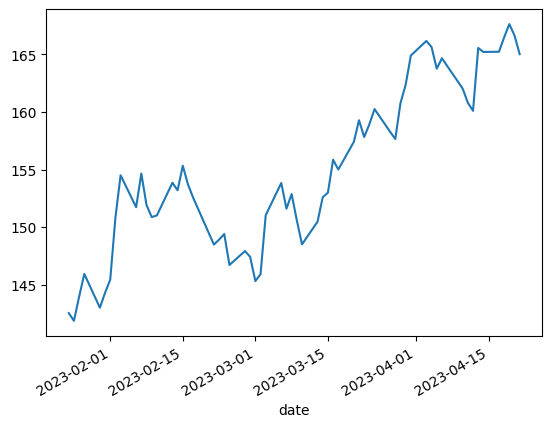

In [7]:
apple_df['close'].plot(kind='line');

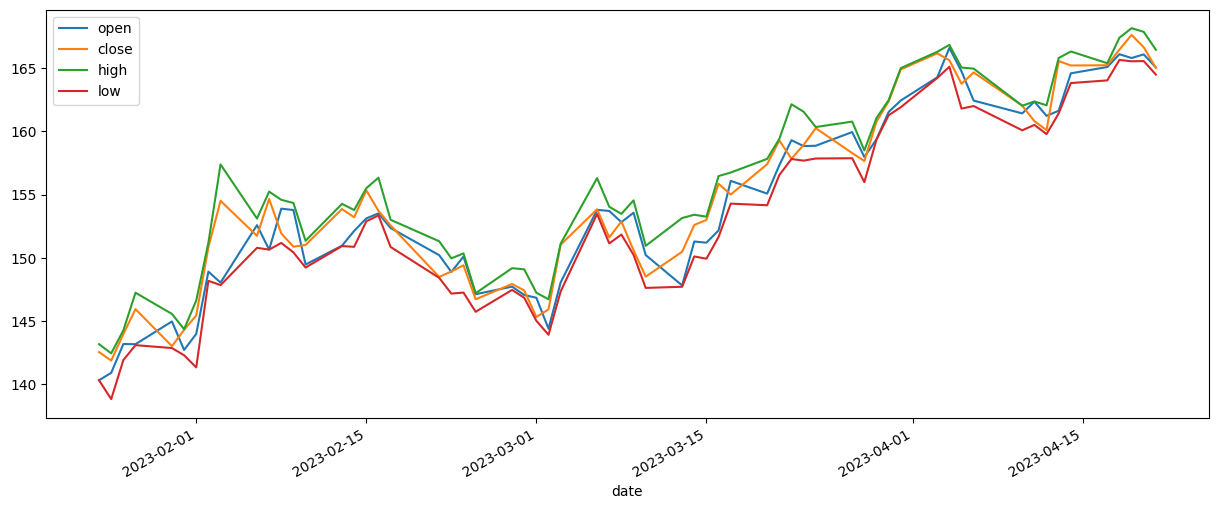

In [9]:
apple_df[['open', 'close', 'high', 'low']].plot(kind='line', figsize=(15,6));

In [11]:
apple_df.columns

Index(['close', 'high', 'low', 'open', 'priceDate', 'symbol', 'volume', 'id',
       'key', 'subkey', 'updated', 'changeOverTime', 'marketChangeOverTime',
       'uOpen', 'uClose', 'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose',
       'fHigh', 'fLow', 'fVolume', 'label', 'change', 'changePercent',
       'company_code'],
      dtype='object')

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-stock-market-api/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.72s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



In [23]:
codes = ['amzn', 'googl', 'meta']
stock_dfs = [apple_df]
for code in codes:
    stock_dfs.append(create_stock_df_of_company(code))

In [25]:
stocks_df = pd.concat(stock_dfs)
stocks_df.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,company_code
date,,,,,,,,,,,,,,,,,,,,,
2023-01-24,142.53,143.16,140.30,140.305,2023-01-24,AAPL,66435142,HISTORICAL_PRICES,AAPL,,...,66435142,140.091,142.313,142.942,140.086,66435142,"Jan 24, 23",0.00,0.0000,aapl
2023-01-25,141.86,142.43,138.81,140.890,2023-01-25,AAPL,65799349,HISTORICAL_PRICES,AAPL,,...,65799349,140.675,141.644,142.213,138.598,65799349,"Jan 25, 23",-0.67,-0.0047,aapl
2023-01-26,143.96,144.25,141.90,143.170,2023-01-26,AAPL,54105068,HISTORICAL_PRICES,AAPL,,...,54105068,142.952,143.741,144.030,141.684,54105068,"Jan 26, 23",2.10,0.0148,aapl
2023-01-27,145.93,147.23,143.08,143.155,2023-01-27,AAPL,70555843,HISTORICAL_PRICES,AAPL,,...,70555843,142.937,145.708,147.006,142.862,70555843,"Jan 27, 23",1.97,0.0137,aapl
2023-01-30,143.00,145.55,142.85,144.955,2023-01-30,AAPL,64015274,HISTORICAL_PRICES,AAPL,,...,64015274,144.734,142.782,145.328,142.632,64015274,"Jan 30, 23",-2.93,-0.0201,aapl


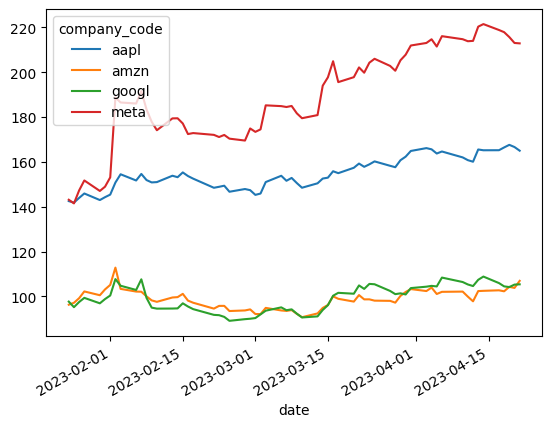

In [27]:
# Pivot the table to get company_code as columns
pivot_df = stocks_df.pivot(columns='company_code', values='close')
pivot_df.plot(kind='line');

In [33]:
def normalize(series):
    return series/series[0]

normalized_pivot = pivot_df.apply(normalize, axis=0)

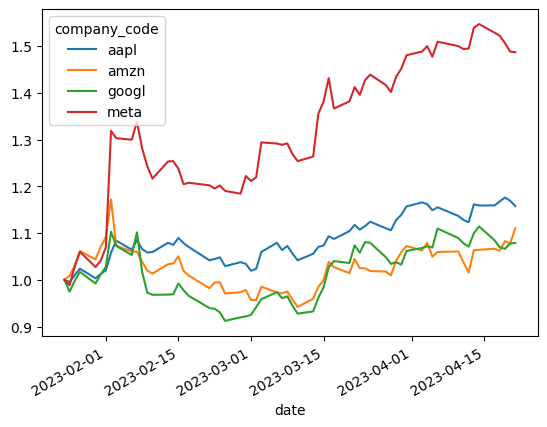

In [34]:
normalized_pivot.plot(kind='line');